# Averaging Filters

In [1]:
from utils import *
import skimage.io as io
import skimage.filters as filters
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
'''
Custom median filter algorithm
'''
def apply_median_filter(img):
    img_w_pad = np.pad(img, pad_width=1, mode='constant', constant_values=0)
    img_w_median_filter = np.zeros(img.shape)

    for r in range(1, img_w_pad.shape[0] - 1):
        for c in range(1, img_w_pad.shape[1] - 1):
            img_w_median_filter[r-1][c-1] = np.median(
                img_w_pad[r-1:r+1,c-1:c+1].reshape(1,-1)
                )
    
    return img_w_median_filter

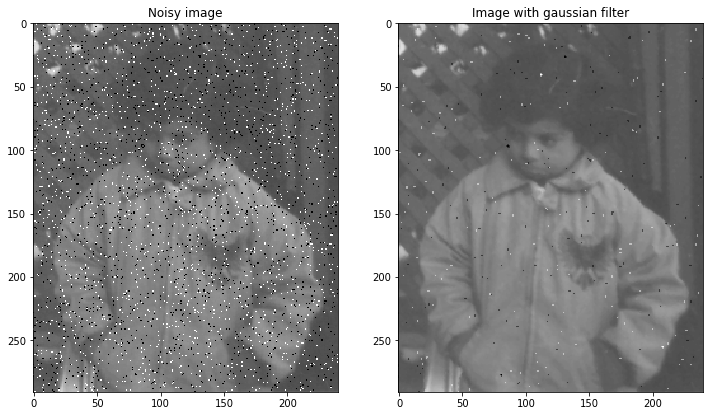

In [3]:
img = io.imread('pout.tif')
img_w_noise = random_noise(image=img, mode='s&p', amount=0.05)
img_w_median_filter = apply_median_filter(img_w_noise)

show_images([img_w_noise, img_w_median_filter],
            ['Noisy image', 'Image with gaussian filter'])

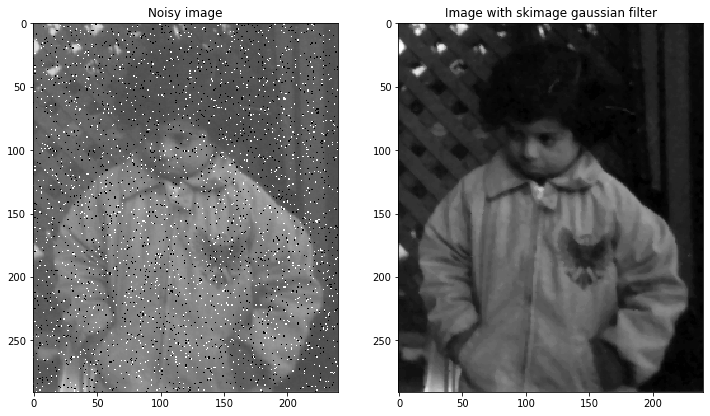

In [4]:
'''
skimage median filter
'''
img = io.imread('pout.tif')
img_w_noise = random_noise(image=img, mode='s&p', amount=0.05)
img_w_median_filter = filters.median(image=img_w_noise)

show_images([img_w_noise, img_w_median_filter],
            ['Noisy image', 'Image with skimage gaussian filter'])

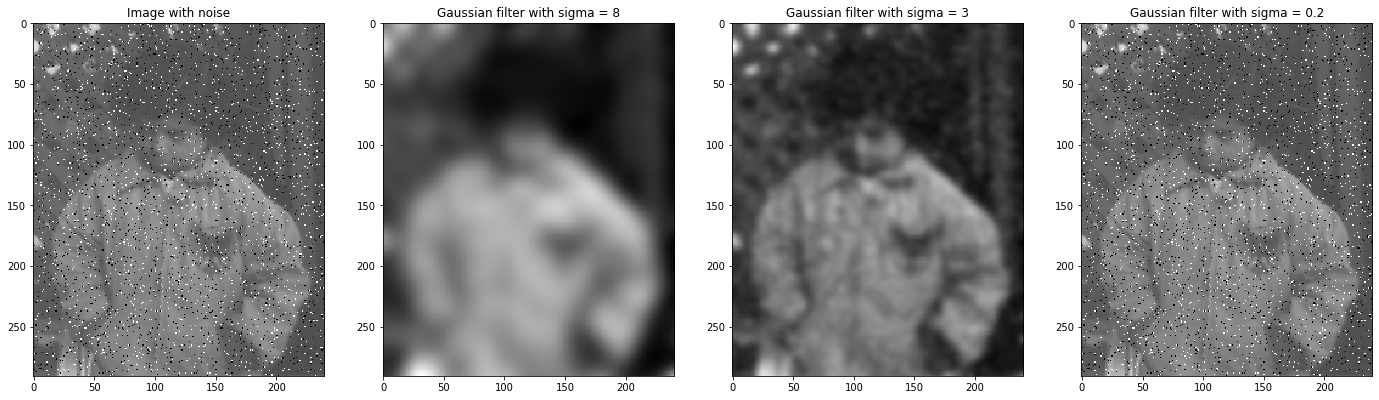

In [5]:
'''
Gaussion Filters
'''
img = io.imread('pout.tif')
img_w_noise = random_noise(image=img, mode='s&p', amount=0.05)

img_w_median_filter_8 = filters.gaussian(image=img_w_noise, sigma=8)
img_w_median_filter_3 = filters.gaussian(image=img_w_noise, sigma=3)
img_w_median_filter_02 = filters.gaussian(image=img_w_noise, sigma=0.2)

show_images([img_w_noise, 
             img_w_median_filter_8, 
             img_w_median_filter_3,
             img_w_median_filter_02], 
            ['Image with noise', 
             'Gaussian filter with sigma = 8', 
             'Gaussian filter with sigma = 3',
             'Gaussian filter with sigma = 0.2']
            )